This was run on Google Colab Pro, using an A100 gpu with 40gb VRAM.

I wasn't able to run such models on free version of Colab.

# Login to huggingface to fetch the models

In [2]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: read)

# Flux Redux model

The Flux Redux model accepts both an image and a prompt when generating new images.

The image is intended to provide the style, while the prompt is meant to guide the content of the new image.

However, it seems that the model mostly ignores the prompt and instead generates variations of the provided image. In practice, it uses the image heavily but doesn't meaningfully incorporate the prompt into the output.

This appears to be due to limitations in the currently available version — full prompt-based guidance alongside image input is only supported via the API or Pro version: https://github.com/black-forest-labs/flux/blob/main/docs/image-variation.md


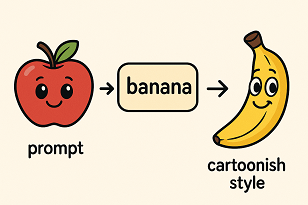

In [3]:
import torch
from diffusers import FluxPriorReduxPipeline, FluxPipeline
from transformers import CLIPTextModel, CLIPTokenizer, T5EncoderModel, T5TokenizerFast
from diffusers.utils import load_image

dtype = torch.bfloat16 if torch.cuda.is_available() else torch.float32

clip_tok = CLIPTokenizer.from_pretrained(
    "black-forest-labs/FLUX.1-dev", subfolder="tokenizer", torch_dtype=dtype
)
clip_enc = CLIPTextModel.from_pretrained(
    "black-forest-labs/FLUX.1-dev", subfolder="text_encoder", torch_dtype=dtype
)
t5_tok = T5TokenizerFast.from_pretrained(
    "black-forest-labs/FLUX.1-dev", subfolder="tokenizer_2", torch_dtype=dtype
)
t5_enc = T5EncoderModel.from_pretrained(
    "black-forest-labs/FLUX.1-dev", subfolder="text_encoder_2", torch_dtype=dtype
)

pipe_prior_redux = FluxPriorReduxPipeline.from_pretrained(
    "black-forest-labs/FLUX.1-Redux-dev",
    text_encoder=clip_enc,
    text_encoder_2=t5_enc,
    tokenizer=clip_tok,
    tokenizer_2=t5_tok,
    torch_dtype=dtype,
).to("cuda")

pipe_prior_redux.enable_model_cpu_offload()
pipe = FluxPipeline.from_pretrained(
    "black-forest-labs/FLUX.1-dev", torch_dtype=dtype
).to("cuda")
pipe.enable_model_cpu_offload()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/705 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/588 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/20.8k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


config.json:   0%|          | 0.00/782 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/19.9k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.53G [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

model_index.json:   0%|          | 0.00/295 [00:00<?, ?B/s]

Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/129M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/857M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/128 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/419 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/3 [00:00<?, ?it/s]

model_index.json:   0%|          | 0.00/536 [00:00<?, ?B/s]

Fetching 23 files:   0%|          | 0/23 [00:00<?, ?it/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/168M [00:00<?, ?B/s]

(…)pytorch_model-00001-of-00003.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

(…)pytorch_model-00002-of-00003.safetensors:   0%|          | 0.00/9.95G [00:00<?, ?B/s]

(…)pytorch_model-00003-of-00003.safetensors:   0%|          | 0.00/3.87G [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/273 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/378 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/820 [00:00<?, ?B/s]

(…)ion_pytorch_model.safetensors.index.json:   0%|          | 0.00/121k [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [7]:
image = load_image("01_Apple.png")

In [8]:
prompt="a yellow banana"
pipe_prior_output = pipe_prior_redux(image,prompt)
images = pipe(
    guidance_scale=2.5,
    num_inference_steps=50,
    generator=torch.Generator("cpu").manual_seed(0),
    **pipe_prior_output,
).images
images[0].save("flux-dev-redux.png")


  0%|          | 0/50 [00:00<?, ?it/s]

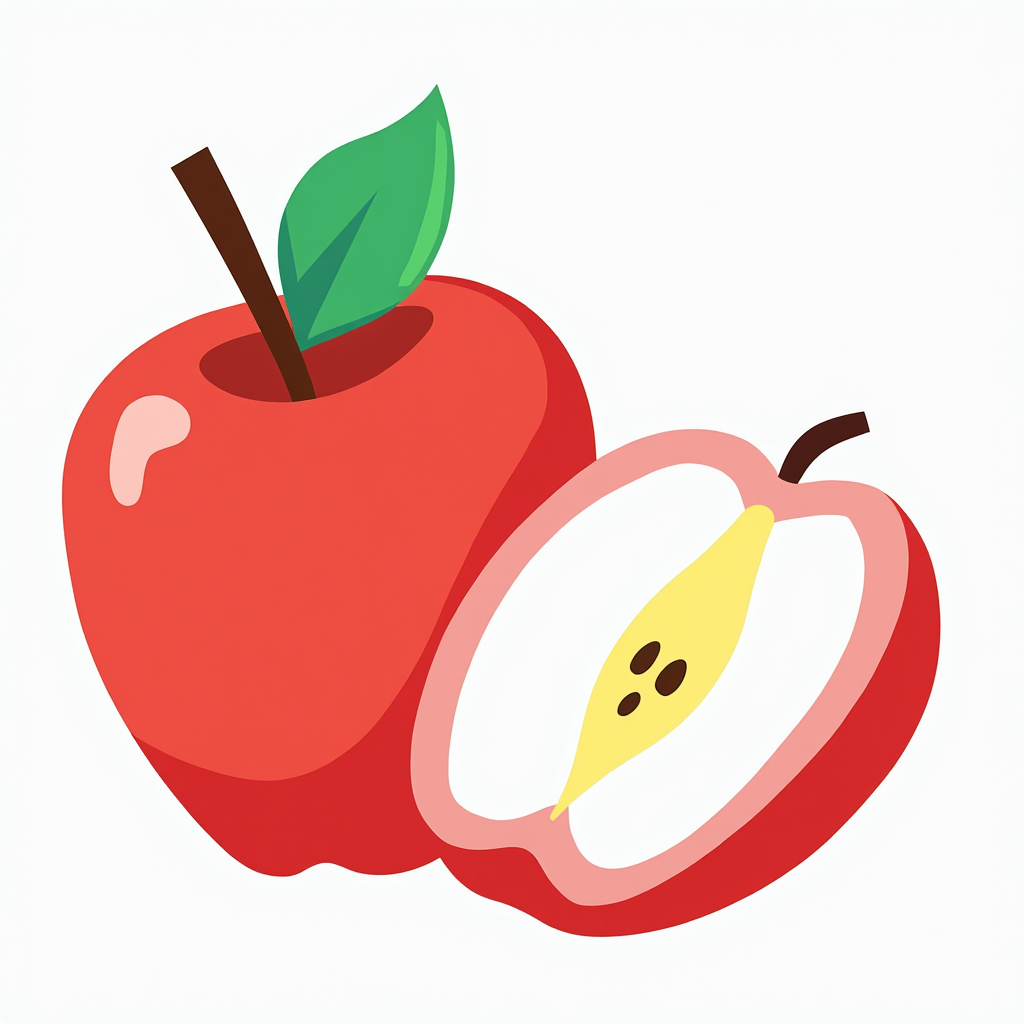

In [9]:
images[0]

# ComfyUI
In this section I used ComfyUI libraries to run the Flux model. It seems ComfyUI pipeline has a workaround for the above mentioned problem.

The same model is also available in the ComfyUI tool. It successfully captures the style of the given image and can generate a new image without needing any explicit style details in the prompt.

Prompt used: `a yellow banana with the same style as the given image`

I used [ComfyUI-to-Python-Extension](https://github.com/pydn/ComfyUI-to-Python-Extension) to convert the ComfyUI pipeline into an executable python script.

Below is a screenshot of the tool executed on my Windows laptop:

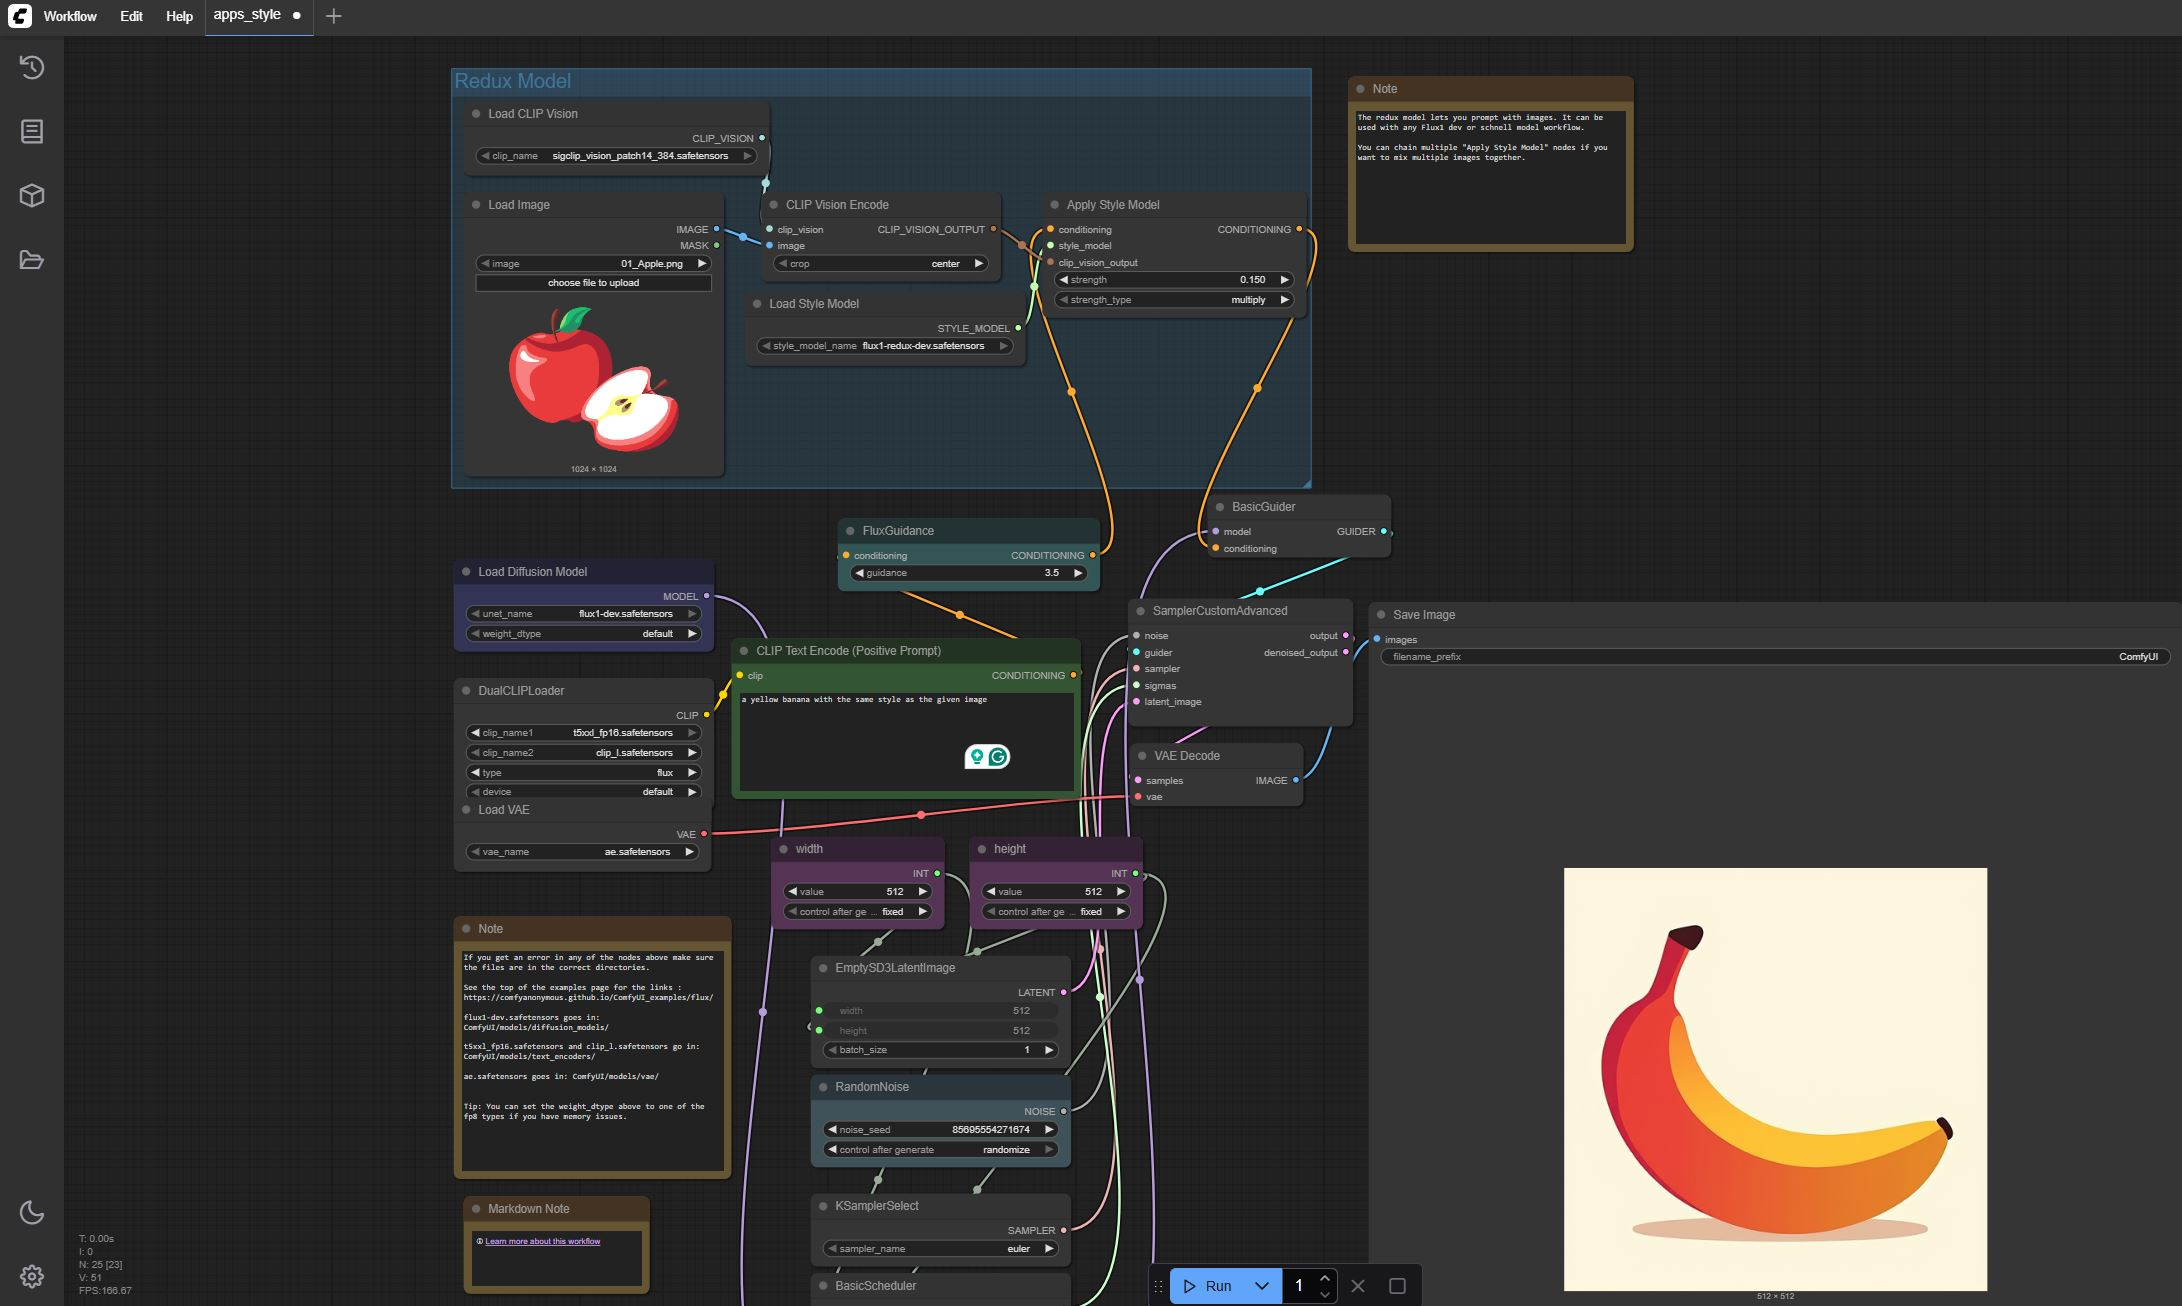

## Download library & models

In [ ]:
!git clone https://github.com/comfyanonymous/ComfyUI

Cloning into 'ComfyUI'...
remote: Enumerating objects: 20112, done.
remote: Counting objects: 100% (202/202), done.
remote: Compressing objects: 100% (123/123), done.
remote: Total 20112 (delta 160), reused 80 (delta 79), pack-reused 19910 (from 5)
Receiving objects: 100% (20112/20112), 69.01 MiB | 16.89 MiB/s, done.
Resolving deltas: 100% (13345/13345), done.


In [13]:
import os
import requests
from pathlib import Path
from huggingface_hub import hf_hub_download

# Model download definitions
models = [
    {
        "name": "t5xxl_fp16.safetensors",
        "url": "https://huggingface.co/comfyanonymous/flux_text_encoders/resolve/main/t5xxl_fp16.safetensors?download=true",
        "directory": "text_encoders",
        "repo_id": "comfyanonymous/flux_text_encoders",
        "filename": "t5xxl_fp16.safetensors"
    },
    {
        "name": "flux1-dev.safetensors",
        "url": "https://huggingface.co/black-forest-labs/FLUX.1-dev/resolve/main/flux1-dev.safetensors?download=true",
        "directory": "diffusion_models",
        "repo_id": "black-forest-labs/FLUX.1-dev",
        "filename": "flux1-dev.safetensors"
    },
    {
        "name": "sigclip_vision_patch14_384.safetensors",
        "url": "https://huggingface.co/Comfy-Org/sigclip_vision_384/resolve/main/sigclip_vision_patch14_384.safetensors?download=true",
        "directory": "clip_vision",
        "repo_id": "Comfy-Org/sigclip_vision_384",
        "filename": "sigclip_vision_patch14_384.safetensors"
    },
    {
        "name": "ae.safetensors",
        "url": "https://huggingface.co/black-forest-labs/FLUX.1-schnell/resolve/main/ae.safetensors?download=true",
        "directory": "vae",
        "repo_id": "black-forest-labs/FLUX.1-schnell",
        "filename": "ae.safetensors"
    },
    {
        "name": "flux1-redux-dev.safetensors",
        "url": "https://huggingface.co/black-forest-labs/FLUX.1-Redux-dev/resolve/main/flux1-redux-dev.safetensors?download=true",
        "directory": "style_models",
        "repo_id": "black-forest-labs/FLUX.1-Redux-dev",
        "filename": "flux1-redux-dev.safetensors"
    },
    {
        "name": "clip_l.safetensors",
        "url": "https://huggingface.co/comfyanonymous/flux_text_encoders/resolve/main/clip_l.safetensors?download=true",
        "directory": "text_encoders",
        "repo_id": "comfyanonymous/flux_text_encoders",
        "filename": "clip_l.safetensors"
    }
]

base_dir = Path("/content/ComfyUI/models")
for model in models:
    directory = model["directory"]

    print(f"Downloading {model['name']} ...")
    try:
        file_path = hf_hub_download(
                repo_id=model["repo_id"],
                filename=model["filename"],
                local_dir=str(base_dir / directory),
                resume_download=True,
            )

    except Exception as e:
        print(f"Failed to download {model['name']}: {e}")


Failed to download clip_l.safetensors: An error happened while trying to locate the file on the Hub and we cannot find the requested files in the local cache. Please check your connection and try again or make sure your Internet connection is on.


## Install dependencies
There aren't many extra required dependencies since this is being run on Colab and it comes with nvidia drivers, cuda, torch, and many libraries already installed.

See the end of this notebook for the full list.

In [ ]:
pip install torchsde trampoline --no-deps

In [1]:
import random
import torch
import sys

sys.path.append("./ComfyUI")

from nodes import (
    DualCLIPLoader,
    CLIPTextEncode,
    CLIPVisionLoader,
    CLIPVisionEncode,
    LoadImage,
    SaveImage,
    StyleModelLoader,
    StyleModelApply,
    VAELoader,
    UNETLoader,
    VAEDecode,
)
from comfy_extras.nodes_custom_sampler import (
    RandomNoise,

    BasicGuider,
    BasicScheduler,
    SamplerCustomAdvanced,
)
from comfy_extras.nodes_model_advanced import ModelSamplingFlux
from comfy_extras.nodes_flux import FluxGuidance

from comfy_extras.nodes_sd3 import EmptySD3LatentImage
from comfy_extras.nodes_custom_sampler import KSamplerSelect

In [2]:
def get_value_at_index(obj, index: int):
    """Returns the value at the given index of a sequence or mapping.

    If the object is a sequence (like list or string), returns the value at the given index.
    If the object is a mapping (like a dictionary), returns the value at the index-th key.

    Some return a dictionary, in these cases, we look for the "results" key

    Args:
        obj (Union[Sequence, Mapping]): The object to retrieve the value from.
        index (int): The index of the value to retrieve.

    Returns:
        Any: The value at the given index.

    Raises:
        IndexError: If the index is out of bounds for the object and the object is not a mapping.
    """
    try:
        return obj[index]
    except KeyError:
        return obj["result"][index]


In [17]:
with torch.inference_mode():
    dualcliploader = DualCLIPLoader()
    print("loading dualcliploader_11")
    dualcliploader_11 = dualcliploader.load_clip(
        clip_name1="t5xxl_fp16.safetensors",
        clip_name2="clip_l.safetensors",
        type="flux",
        device="default",
    )
    print("loaded dualcliploader_11")

    cliptextencode = CLIPTextEncode()
    cliptextencode_6 = cliptextencode.encode(
        text="a banana fruit",
        clip=get_value_at_index(dualcliploader_11, 0),
    )
    print("loaded cliptextencode_6")

    vaeloader = VAELoader()
    vaeloader_10 = vaeloader.load_vae(vae_name="ae.safetensors")
    print("loaded vaeloader_10")

    unetloader = UNETLoader()
    unetloader_12 = unetloader.load_unet(
        unet_name="flux1-dev.safetensors", weight_dtype="fp8_e4m3fn"
    )
    print("loaded unetloader_12")

    ksamplerselect = KSamplerSelect()
    ksamplerselect_16 = ksamplerselect.get_sampler(sampler_name="euler")
    print("loaded ksamplerselect_16")

    randomnoise = RandomNoise()
    randomnoise_25 = randomnoise.get_noise(noise_seed=random.randint(1, 2**64))
    print("loaded randomnoise_25")

    emptysd3latentimage = EmptySD3LatentImage()
    emptysd3latentimage_27 = emptysd3latentimage.generate(
        width=512, height=512, batch_size=1
    )
    print("loaded emptysd3latentimage_27")

    clipvisionloader = CLIPVisionLoader()
    clipvisionloader_38 = clipvisionloader.load_clip(
        clip_name="sigclip_vision_patch14_384.safetensors"
    )
    print("loaded clipvisionloader_38")

    loadimage = LoadImage()
    loadimage_40 = loadimage.load_image(image="/content/01_Apple.png")

    clipvisionencode = CLIPVisionEncode()
    clipvisionencode_39 = clipvisionencode.encode(
        crop="center",
        clip_vision=get_value_at_index(clipvisionloader_38, 0),
        image=get_value_at_index(loadimage_40, 0),
    )
    print("loaded clipvisionencode_39")

    stylemodelloader = StyleModelLoader()
    stylemodelloader_42 = stylemodelloader.load_style_model(
        style_model_name="flux1-redux-dev.safetensors"
    )
    print("loaded stylemodelloader_42")

    modelsamplingflux = ModelSamplingFlux()
    fluxguidance = FluxGuidance()
    stylemodelapply = StyleModelApply()
    basicguider = BasicGuider()
    basicscheduler = BasicScheduler()
    samplercustomadvanced = SamplerCustomAdvanced()
    vaedecode = VAEDecode()
    saveimage = SaveImage()

    print("Starting")
    for q in range(1):
        modelsamplingflux_30 = modelsamplingflux.patch(
            max_shift=1.15,
            base_shift=0.5,
            width=512,
            height=512,
            model=get_value_at_index(unetloader_12, 0),
        )

        fluxguidance_26 = fluxguidance.append(
            guidance=31.5, conditioning=get_value_at_index(cliptextencode_6, 0)
        )

        stylemodelapply_41 = stylemodelapply.apply_stylemodel(
            strength=0.15,
            strength_type="multiply",
            conditioning=get_value_at_index(fluxguidance_26, 0),
            style_model=get_value_at_index(stylemodelloader_42, 0),
            clip_vision_output=get_value_at_index(clipvisionencode_39, 0),
        )

        basicguider_22 = basicguider.get_guider(
            model=get_value_at_index(modelsamplingflux_30, 0),
            conditioning=get_value_at_index(stylemodelapply_41, 0),
        )

        basicscheduler_17 = basicscheduler.get_sigmas(
            scheduler="simple",
            steps=50,
            denoise=1,
            model=get_value_at_index(modelsamplingflux_30, 0),
        )

        samplercustomadvanced_13 = samplercustomadvanced.sample(
            noise=get_value_at_index(randomnoise_25, 0),
            guider=get_value_at_index(basicguider_22, 0),
            sampler=get_value_at_index(ksamplerselect_16, 0),
            sigmas=get_value_at_index(basicscheduler_17, 0),
            latent_image=get_value_at_index(emptysd3latentimage_27, 0),
        )

        vaedecode_8 = vaedecode.decode(
            samples=get_value_at_index(samplercustomadvanced_13, 0),
            vae=get_value_at_index(vaeloader_10, 0),
        )

        saveimage_9 = saveimage.save_images(
            filename_prefix="ComfyUI", images=get_value_at_index(vaedecode_8, 0)
        )



loading dualcliploader_11


loaded dualcliploader_11
loaded cliptextencode_6
loaded vaeloader_10
loaded unetloader_12
loaded ksamplerselect_16
loaded randomnoise_25
loaded emptysd3latentimage_27
loaded clipvisionloader_38
loaded clipvisionencode_39
loaded stylemodelloader_42
Starting


  0%|          | 0/50 [00:00<?, ?it/s]

### Result
This solution again resulted in a variation of the original image, without effectively utilizing the prompt. I was hoping that, since ComfyUI was working as expected, this approach would also perform well. However, it seems further investigation is needed.

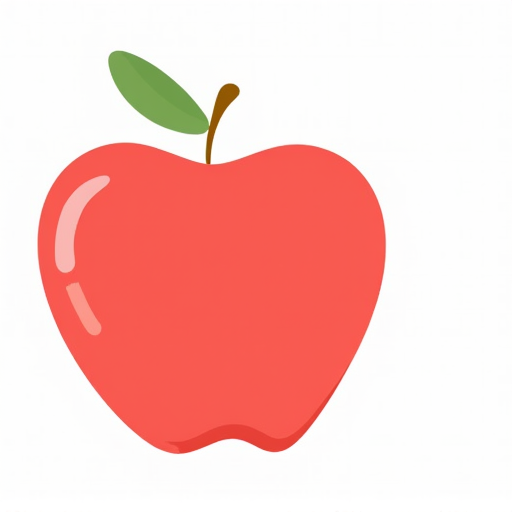

In [5]:
filename = saveimage_9['ui']['images'][0]['filename']

from IPython.display import Image, display
display(Image(filename=f"ComfyUI/output/{filename}"))

# Full list of installed packages

In [4]:
!pip list

Package                               Version
------------------------------------- ------------------
absl-py                               1.4.0
accelerate                            1.7.0
aiofiles                              24.1.0
aiohappyeyeballs                      2.6.1
aiohttp                               3.11.15
aiosignal                             1.3.2
alabaster                             1.0.0
albucore                              0.0.24
albumentations                        2.0.8
ale-py                                0.11.1
altair                                5.5.0
annotated-types                       0.7.0
antlr4-python3-runtime                4.9.3
anyio                                 4.9.0
argon2-cffi                           25.1.0
argon2-cffi-bindings                  21.2.0
array_record                          0.7.2
arviz                                 0.21.0
astropy                               7.1.0
astropy-iers-data                     0.2025.6.2.0.38